In [ ]:
!nvidia-smi

Fri Dec 15 03:08:54 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Directory

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov8x-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=true

/content
100% 137M/137M [00:00<00:00, 189MB/s]
2023-12-15 03:09:48.130749: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 03:09:48.130813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 03:09:48.132686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 03:09:51.546757: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

100% 104k/104k [00

/content


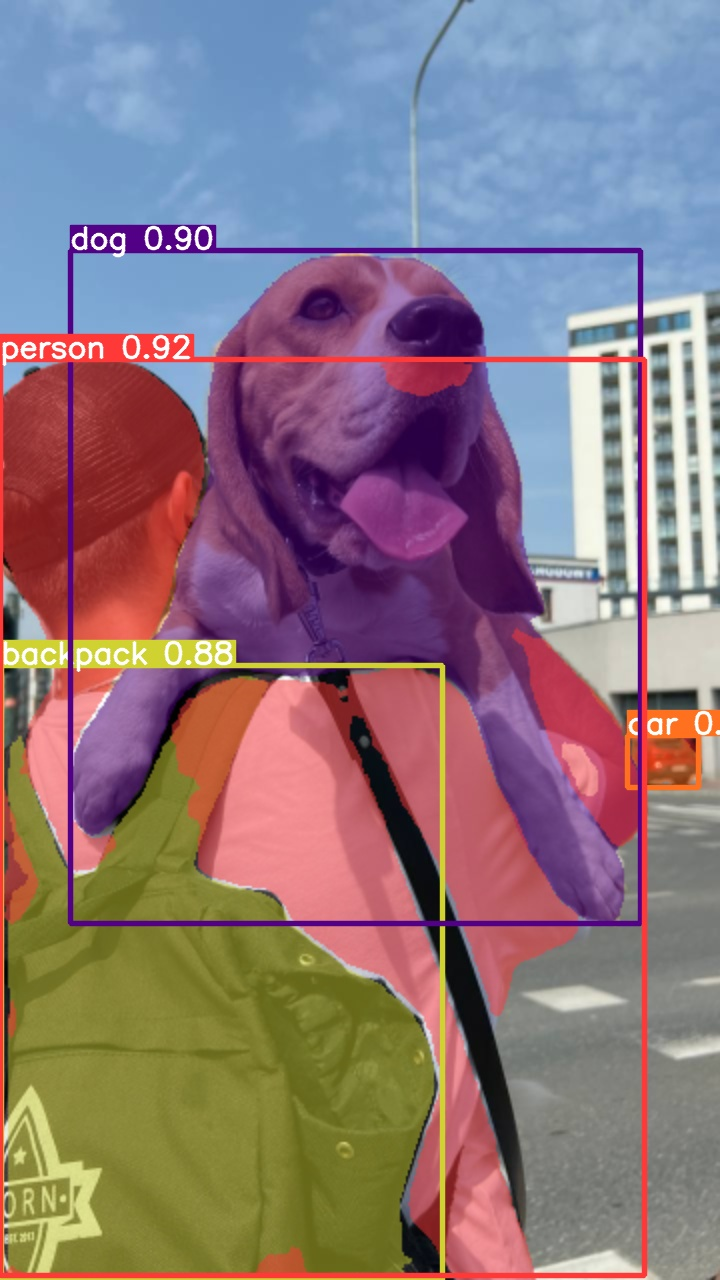

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

# Preparing a custom dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="M8jAJrzqcQKUkqIkCh0W")
project = rf.workspace("laguna-state-polytechnic-university-7hzrx").project("final-zurvg")
dataset = project.version(1).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not in


Extracting Dataset Version Zip to Final-1 in yolov8:: 100%|██████████| 1476/1476 [00:00<00:00, 3095.59it/s]


# Sample Dataset


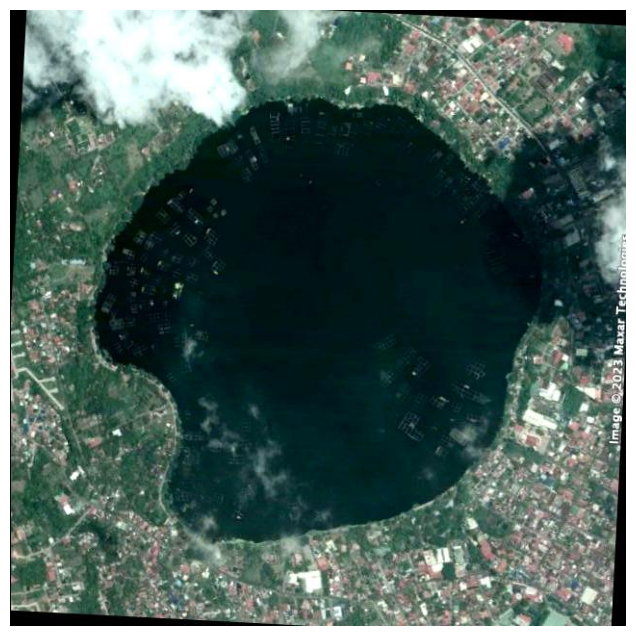

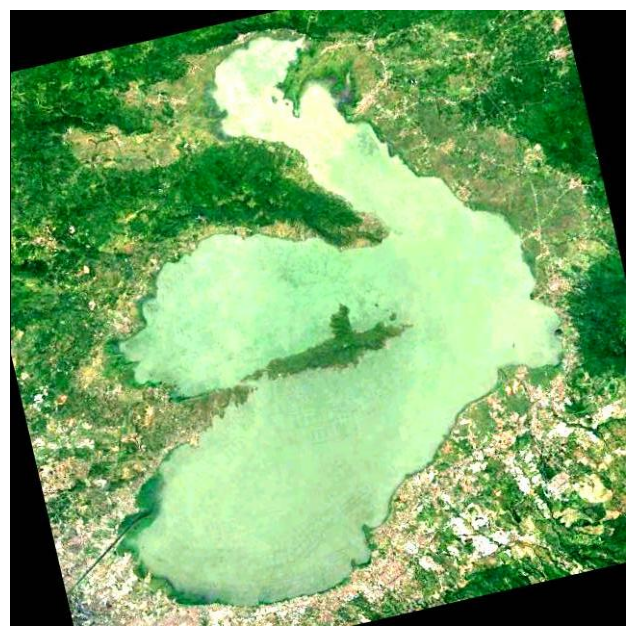

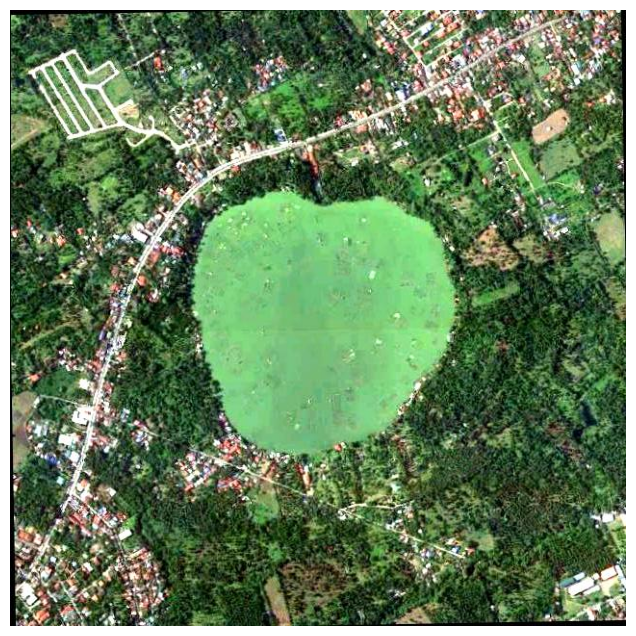

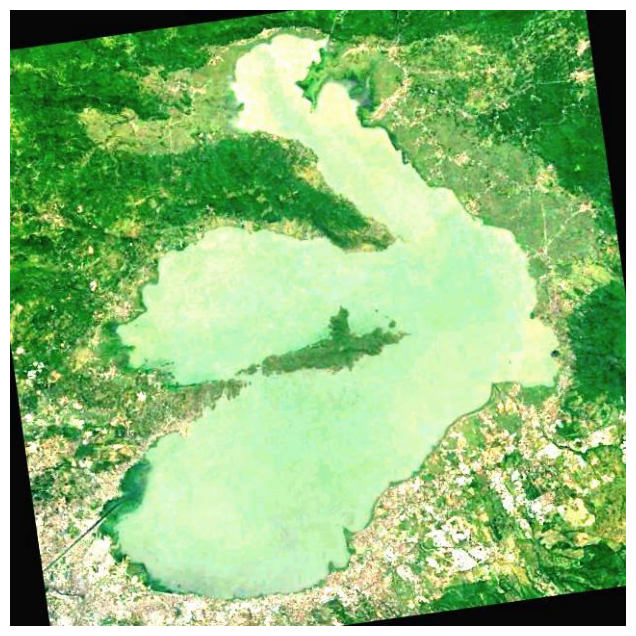

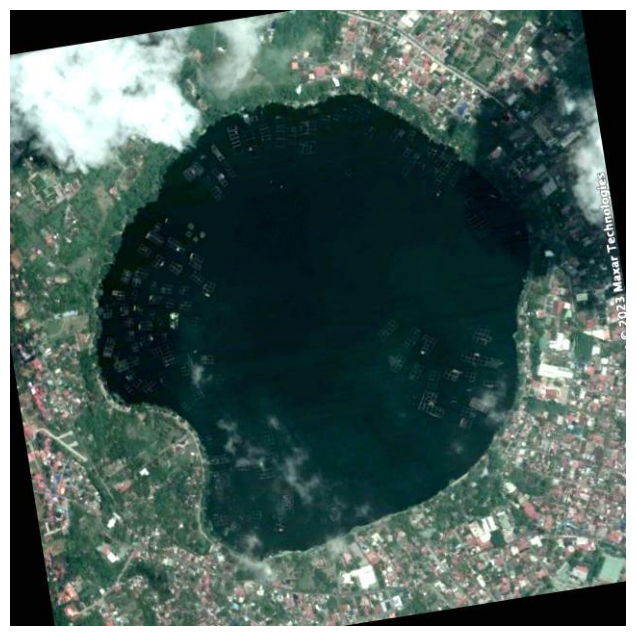

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the path to your downloaded dataset
dataset_path = "/content/datasets/Final-1/train/images"  # Update this path as needed

# List the image files in the dataset folder
image_files = os.listdir(dataset_path)

# Display the first few images
num_images_to_display = 5  # You can change this number as needed
for i in range(num_images_to_display):
    image = cv2.imread(os.path.join(dataset_path, image_files[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Custom Training

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8x-seg.pt data={dataset.location}/data.yaml epochs=200 imgsz=640

/content
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/datasets/Final-1/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=F

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    MaskP_curve.png   train_batch8550.jpg
BoxF1_curve.png					    MaskPR_curve.png  train_batch8551.jpg
BoxP_curve.png					    MaskR_curve.png   train_batch8552.jpg
BoxPR_curve.png					    results.csv       val_batch0_labels.jpg
BoxR_curve.png					    results.png       val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg  weights
events.out.tfevents.1702609942.68b698cbab09.1957.0  train_batch1.jpg
MaskF1_curve.png				    train_batch2.jpg


/content


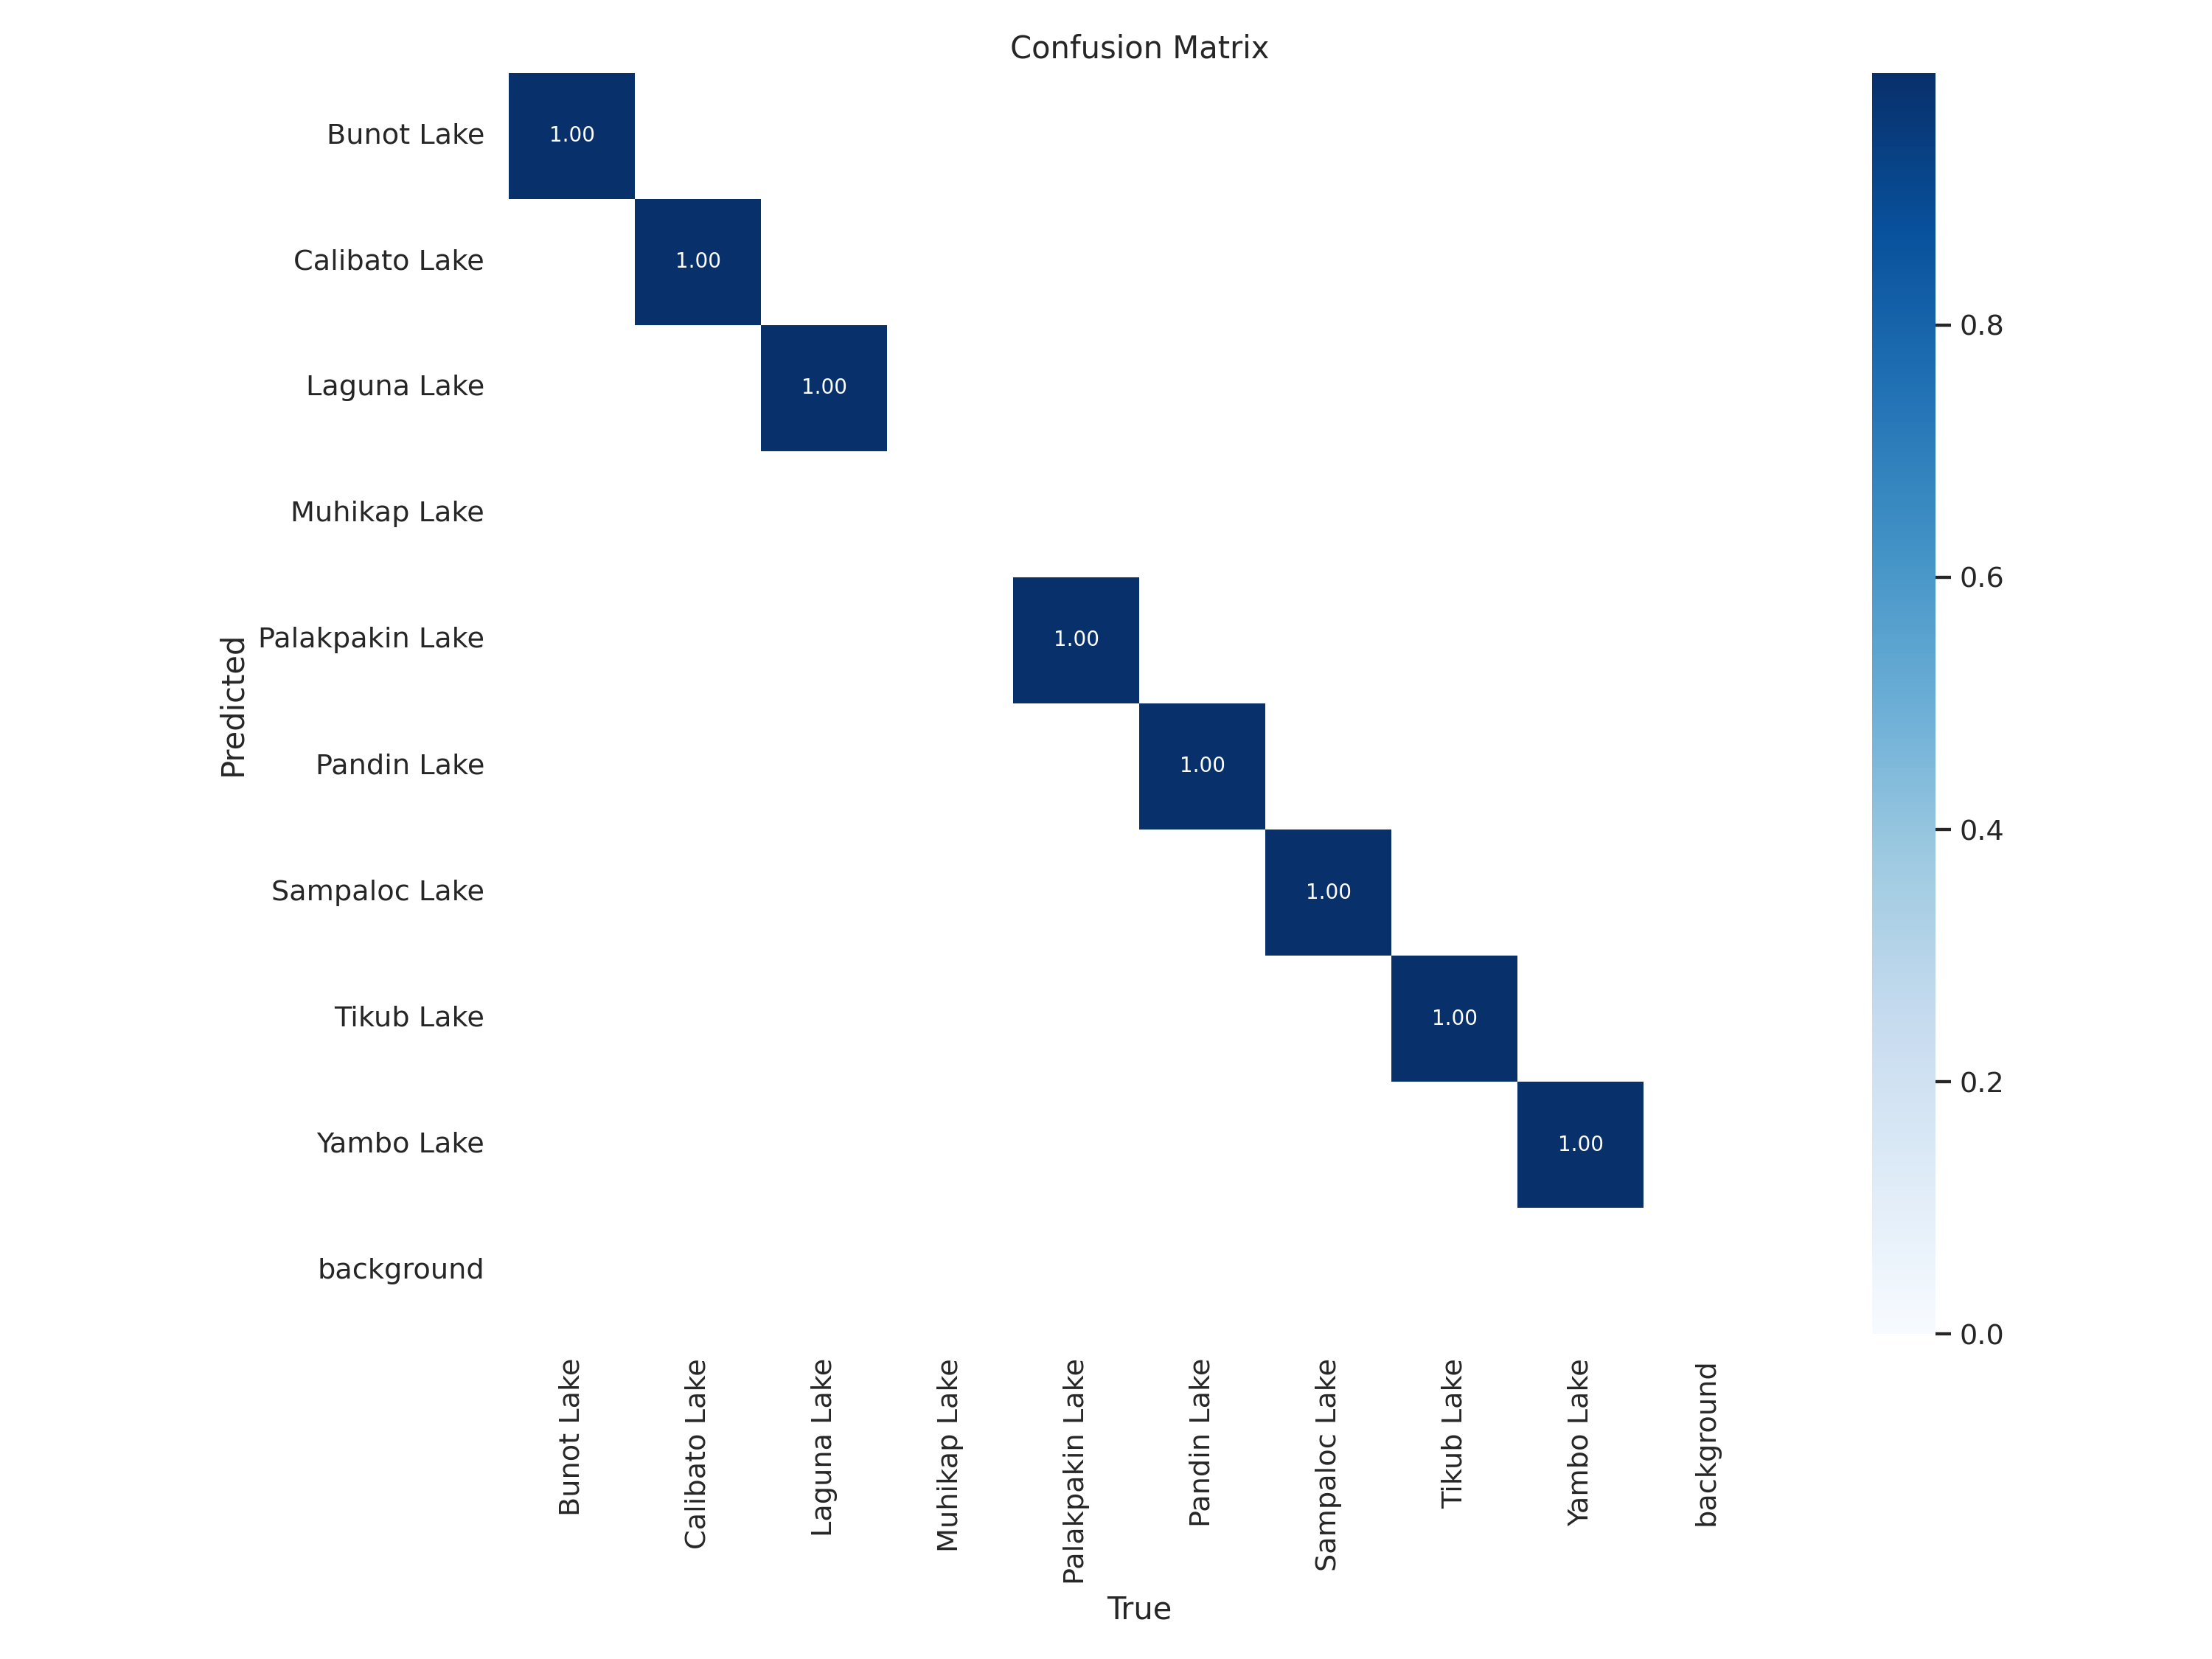

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


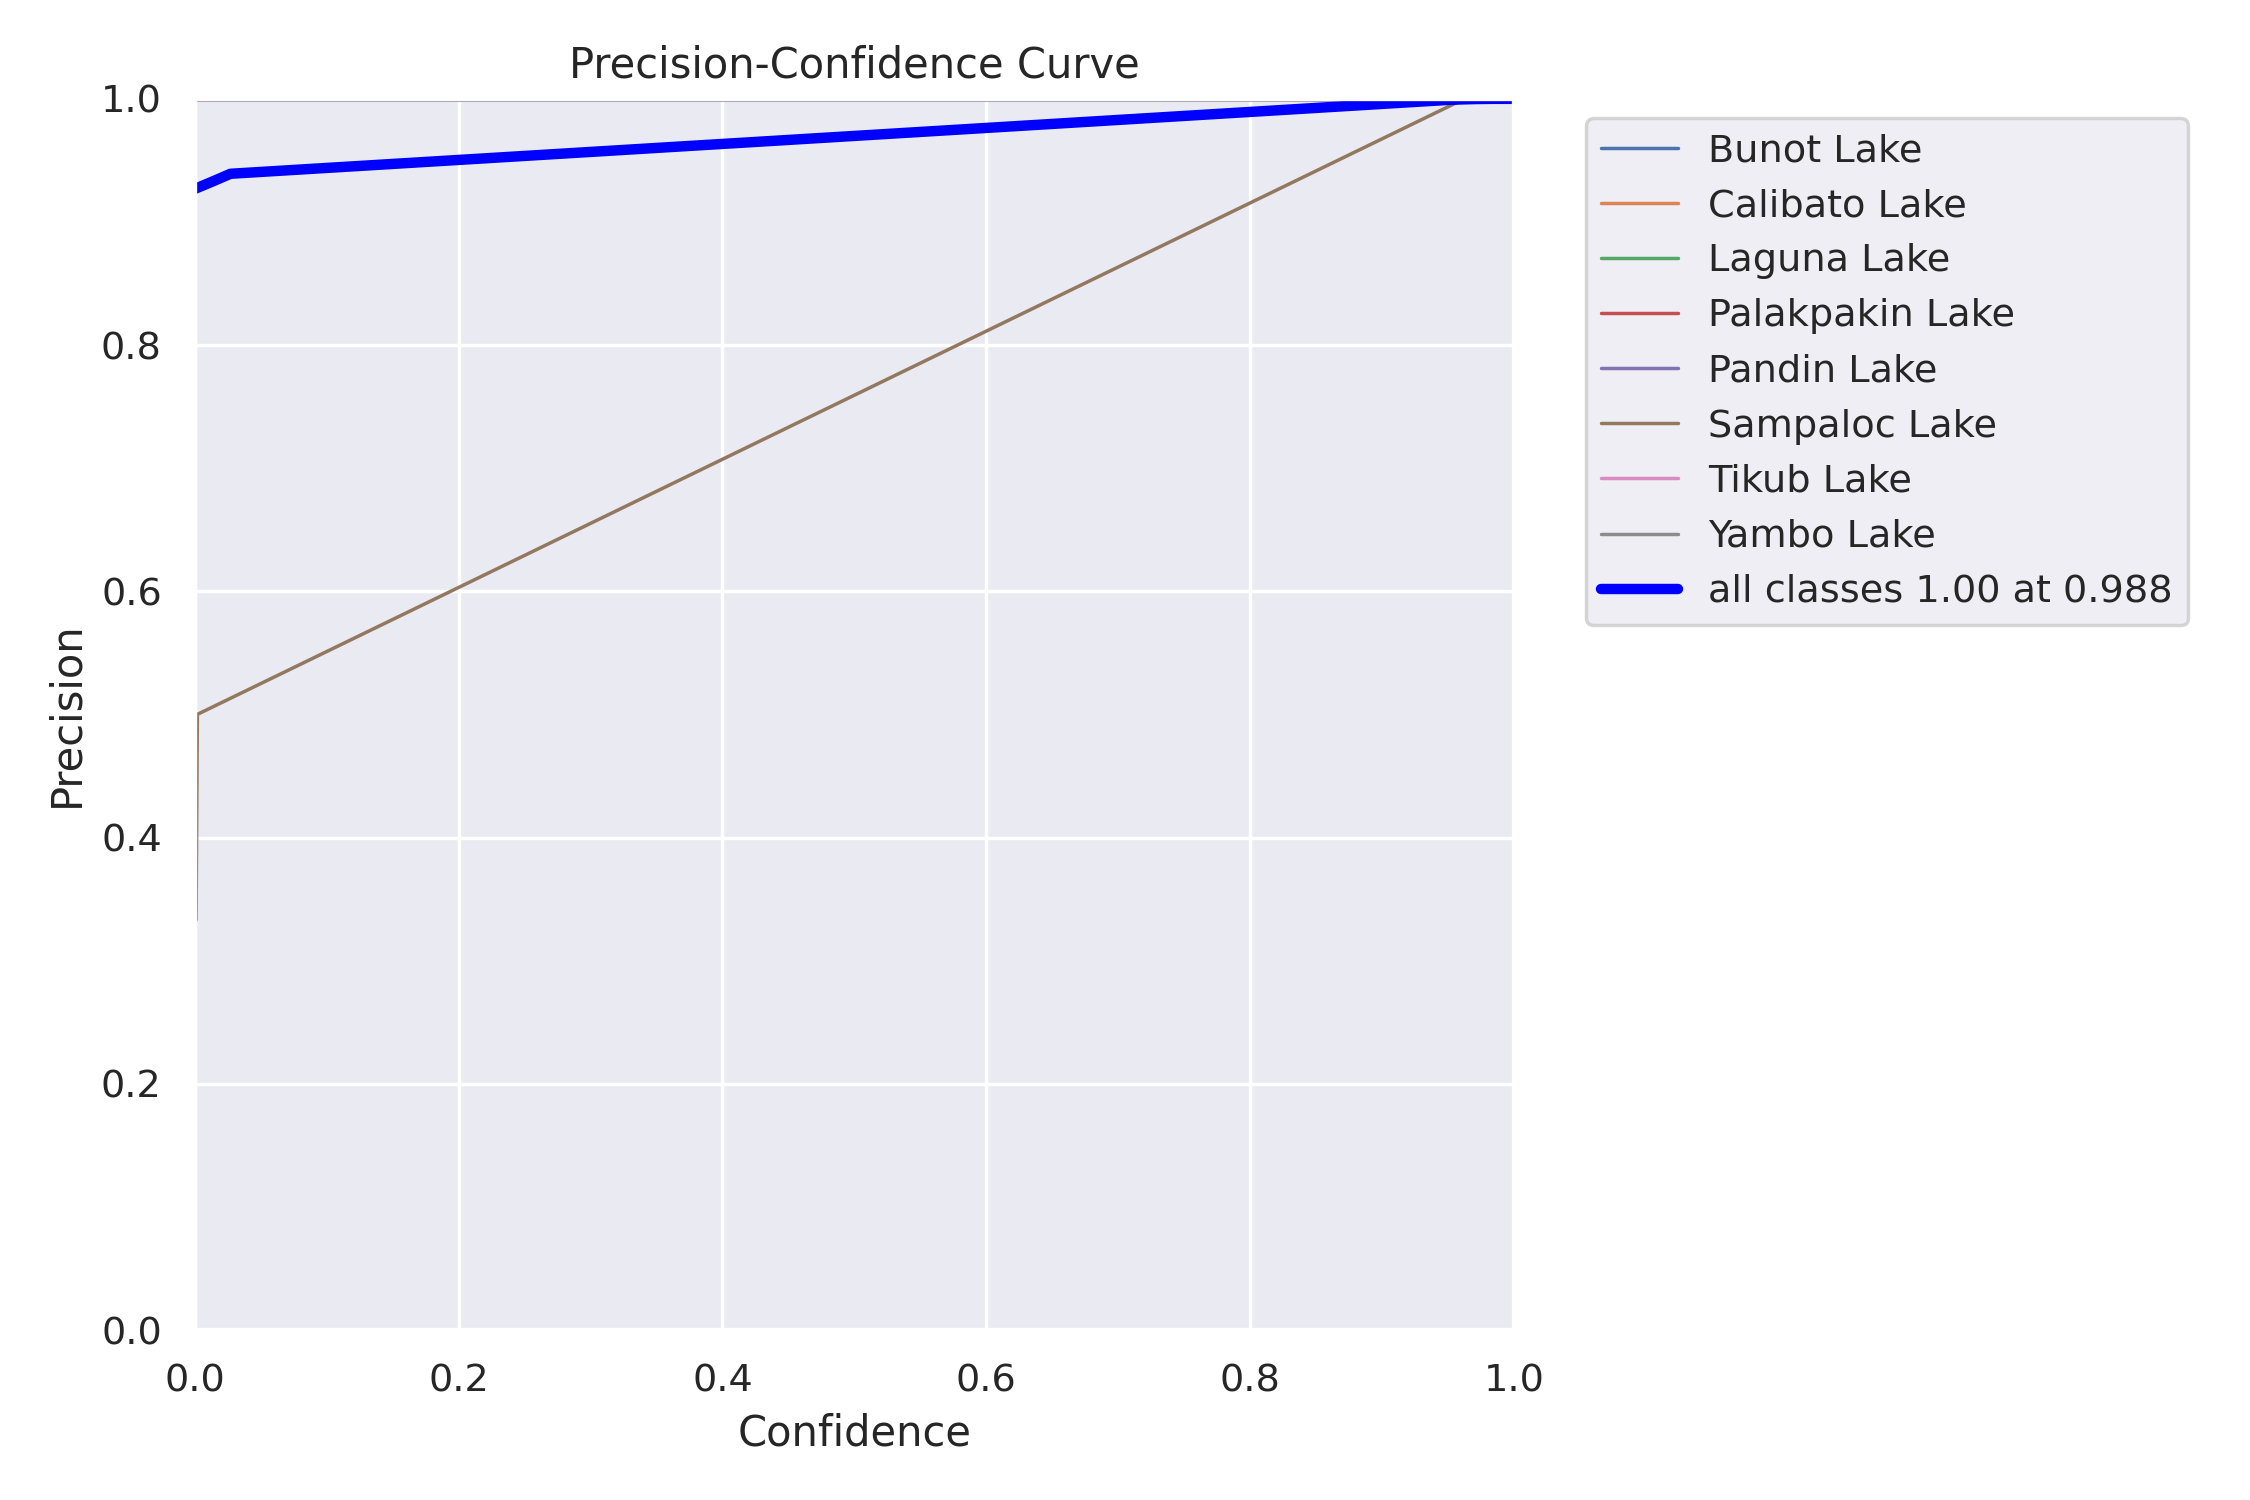

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/BoxP_curve.png', width=600)

/content


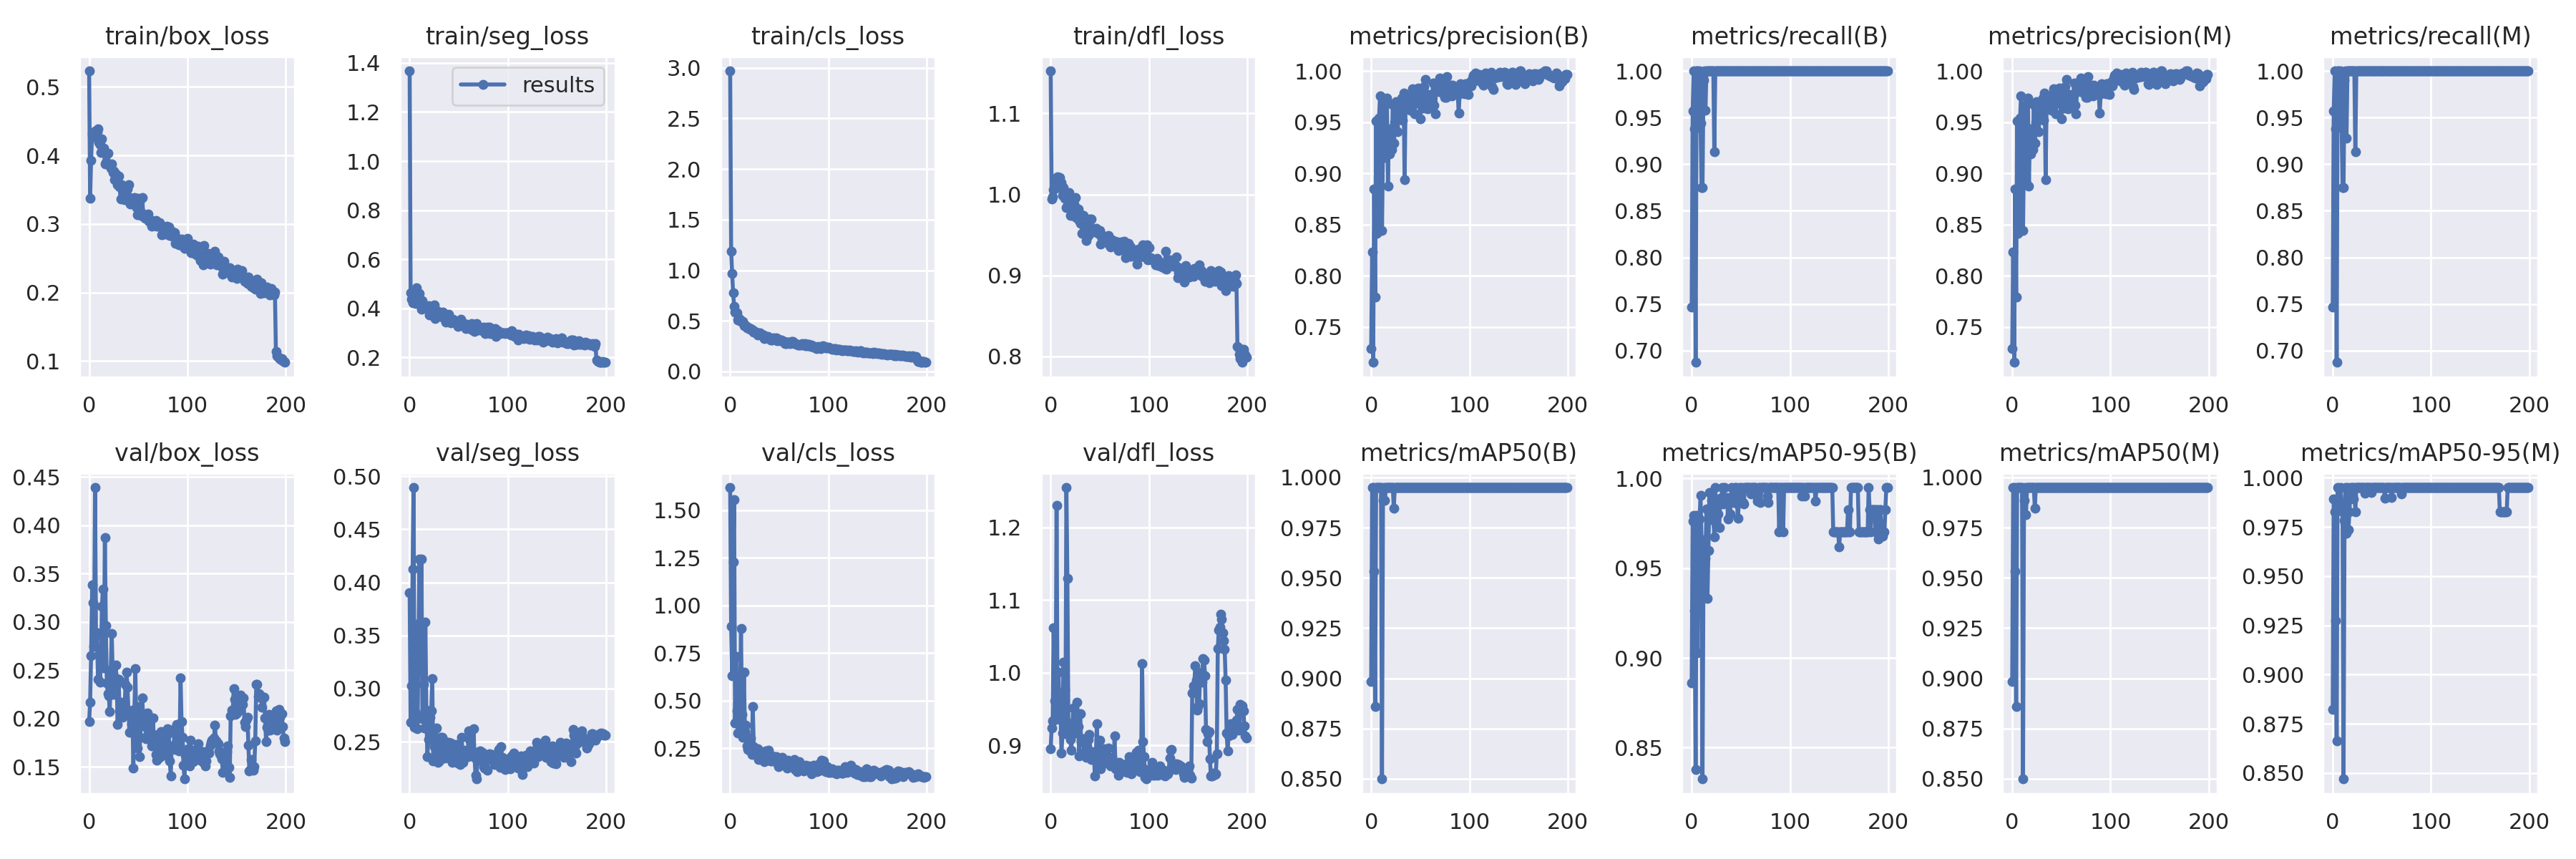

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

# Validate Custom Model

/content


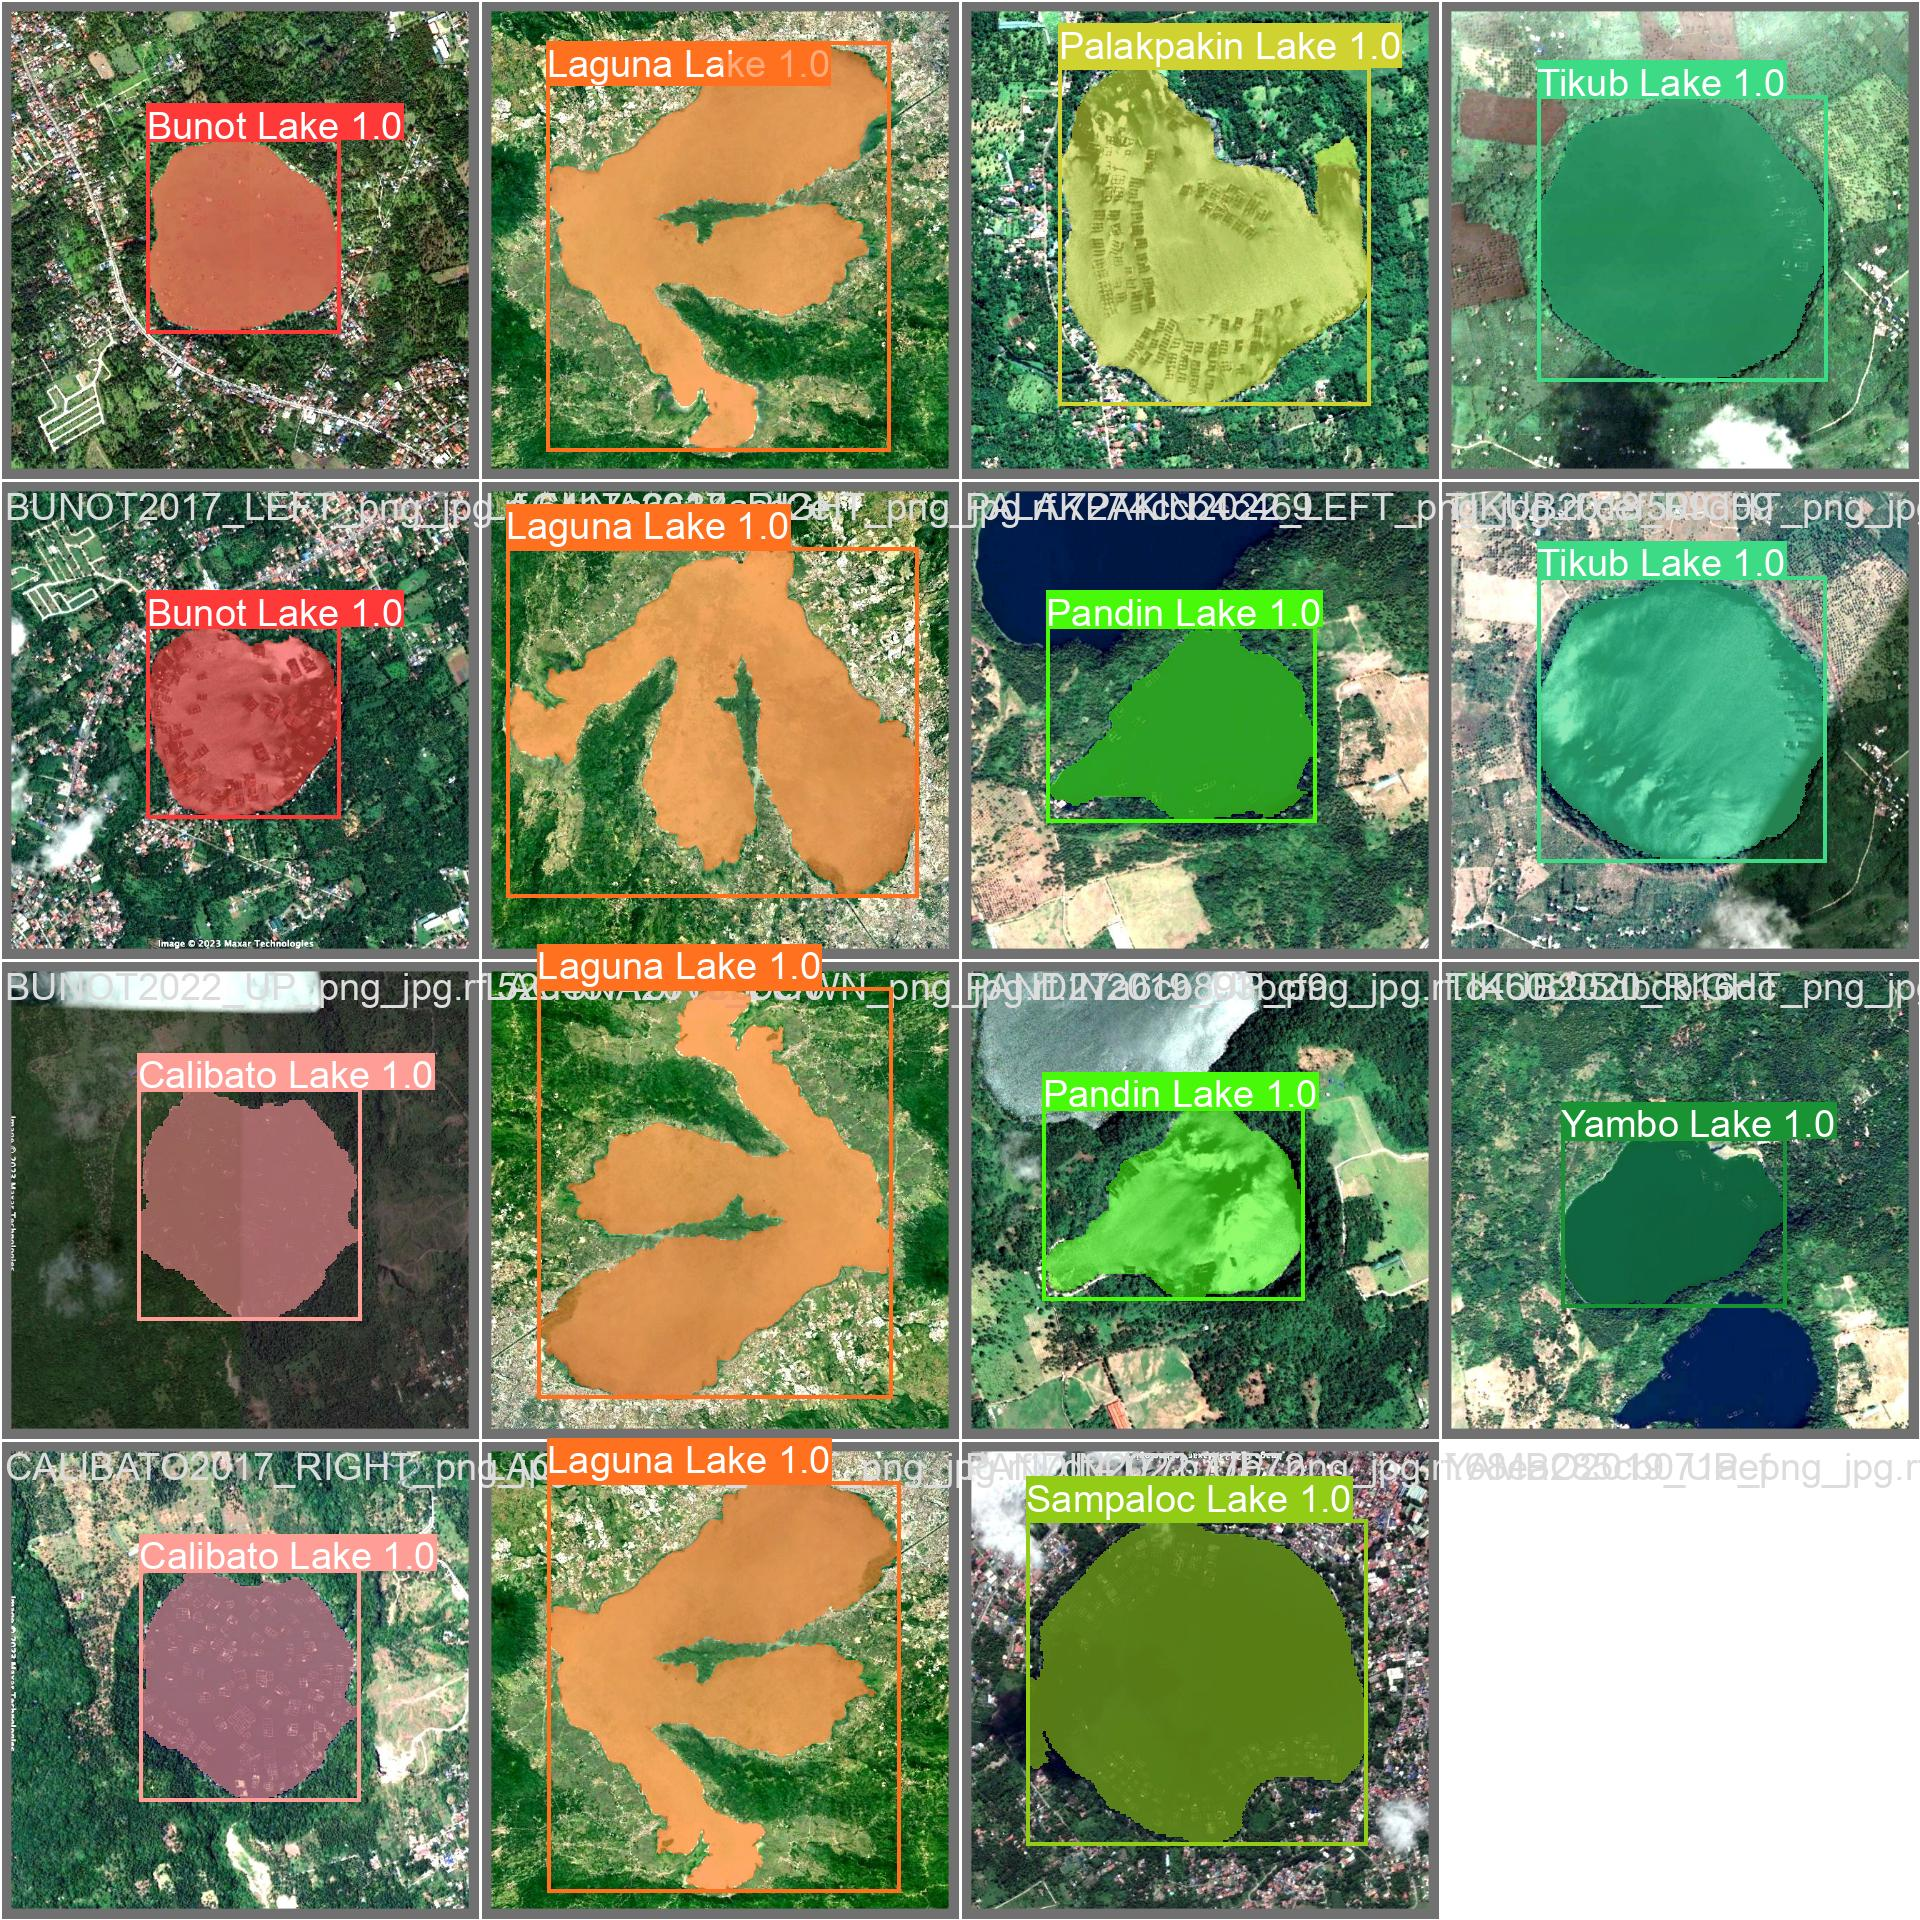

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=640)

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-12-15 07:26:10.910081: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 07:26:10.910133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 07:26:10.911441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 07:26:12.696605: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71729323 parameters, 0 gradients, 343.7 GFLOPs
val: Scanning /content/datasets/Final-1/valid/labels.cach

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-12-15 07:26:39.802786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 07:26:39.802841: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 07:26:39.804105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 07:26:40.825452: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 295 layers, 71729323 parameters, 0 gradients, 343.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/6 /con

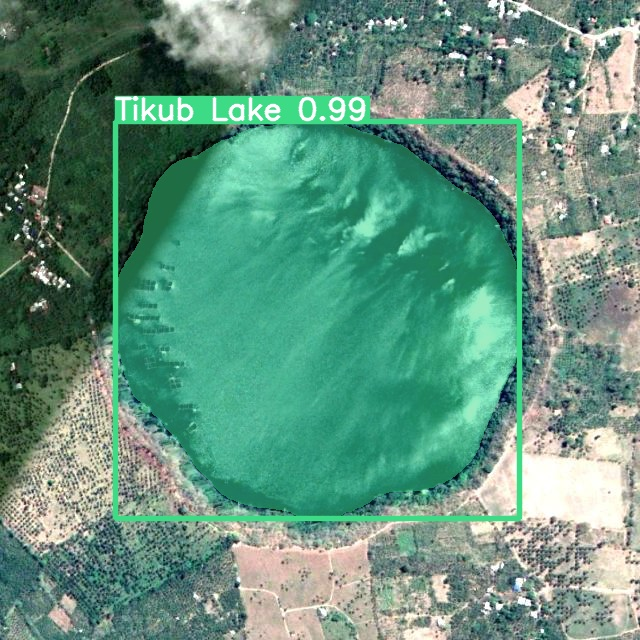

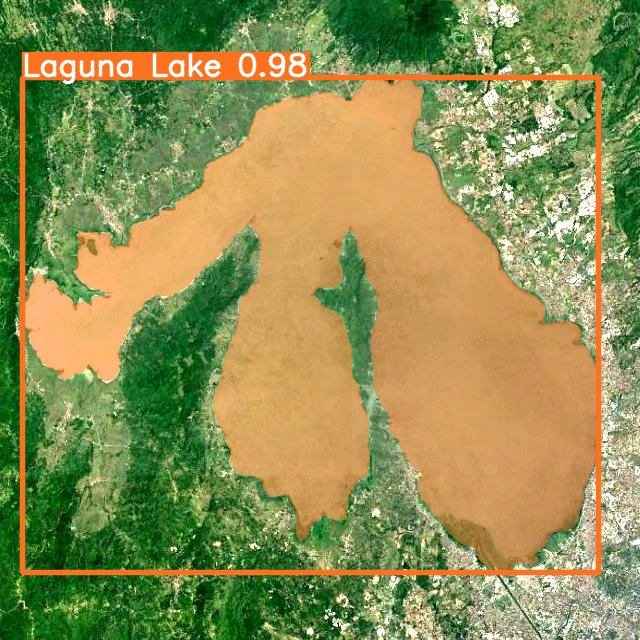

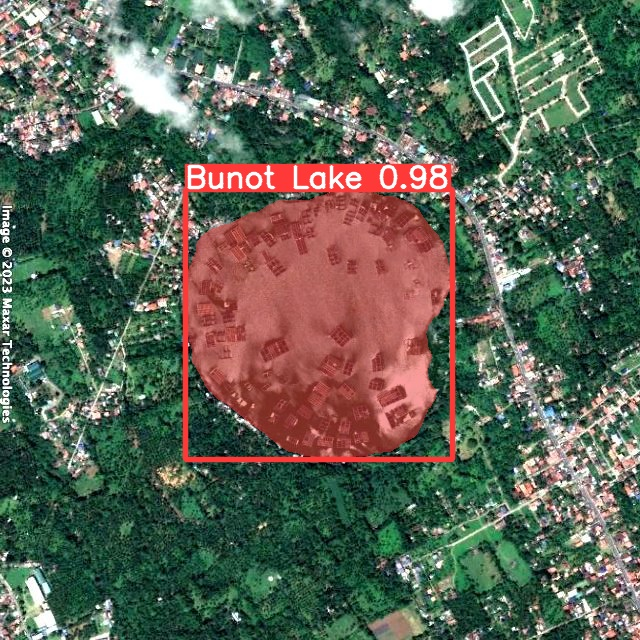

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import cv2
import glob

# Define the path to the directory containing the YOLO prediction images
prediction_path = f'{HOME}/runs/segment/predict2/'

# Function to measure the size of objects in an image
def measure_object_size(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # To separate the object from the background
    ret, thresh = cv2.threshold(gray, 127, 255, 0)

    # Find the contours of the object
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    # Get the area of the object in pixels
    area = cv2.contourArea(contours[0])

    # Convert the area from pixels to a real-world unit of measurement (e.g. cm^2)
    scale_factor = 603  # 1 pixel = 0.1 cm
    size = area * scale_factor ** 2

    # Print the size of the object
    print('Size:', size)

    # Save the image with the contours drawn
    cv2.imwrite('Object.jpeg', img)

# Iterate through the YOLO prediction images and measure the size of each object
for image_path in glob.glob(f'{prediction_path}/*.jpg')[:5]:
    measure_object_size(image_path)

Size: 0.0
Size: 0.0
Size: 0.0
Size: 0.0
Size: 0.0


In [ ]:
from google.colab import files
import os
import shutil
import cv2
import numpy as np
import glob

# Upload the image from your local drive
uploaded = files.upload()

# Move the uploaded image to a directory
uploaded_filename = list(uploaded.keys())[0]
uploaded_path = os.path.join(os.getcwd(), uploaded_filename)
destination_path = os.path.join(HOME, 'upload_image.jpg')
shutil.move(uploaded_path, destination_path)

# Run prediction on the uploaded image using the YOLO model
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={destination_path} save=true

# Function to measure the size of objects in an image
def measure_object_size(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # To separate the object from the background
    ret, thresh = cv2.threshold(gray, 127, 255, 0)

    # Find the contours of the object
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw the contours on the original image
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    if len(contours) > 0:
        # Get the largest contour (assumes the largest object is of interest)
        largest_contour = max(contours, key=cv2.contourArea)

        # Get the area of the object in pixels
        area = cv2.contourArea(largest_contour)

        # Convert the area from pixels to a real-world unit of measurement (e.g., cm^2)
        scale_factor = 191  # 1 pixel = 0.1 cm
        size = area * scale_factor ** 2

        # Print the size of the object
        print('Size:', size)

        # Save the image with the contours drawn
        cv2.imwrite('Object.jpeg', img)
    else:
        print('No object detected in the uploaded image.')

# Measure the size of objects in the uploaded image
measure_object_size(destination_path)

# Display the prediction results
for image_path in glob.glob(f'{HOME}/content/upload_image/*.jpg')[:3]:
    display(Image(filename=image_path, height=600))
    print("\n")

Saving Buhi2022_Up.jpg to Buhi2022_Up.jpg
2023-11-06 08:25:19.883610: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 08:25:19.883725: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 08:25:19.883804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-06 08:25:19.890472: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-

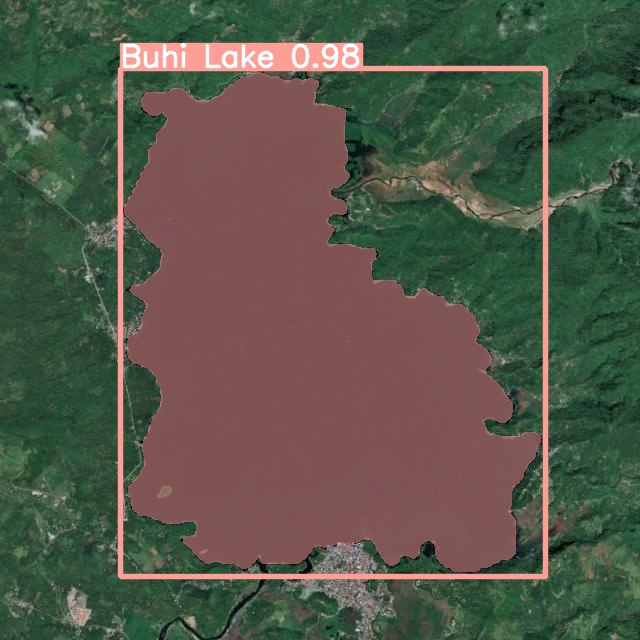

In [ ]:
# Display the prediction results
for image_path in glob.glob(f'{HOME}/runs/segment/predict5/*.jpg')[:3]:
    display(Image(filename=image_path, height=600))
    print("\n")

In [ ]:
'''
from google.colab import files
import os
rom IPython.display import Image, display
import shutil

uploaded = files.upload()

# Move the uploaded image to a directory
uploaded_filename = list(uploaded.keys())[0]
uploaded_path = os.path.join(os.getcwd(), uploaded_filename)
destination_path = os.path.join(HOME, 'upload_image.jpg')
shutil.move(uploaded_path, destination_path)

# Run prediction on the uploaded image
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={destination_path} save=true

# Display the prediction results
for image_path in glob.glob(f'{HOME}/content/upload_image/*.jpg')[:3]:
    display(Image(filename=image_path, height=600))
    print("\n")
'''

'\nfrom google.colab import files\nimport os\nrom IPython.display import Image, display\nimport shutil\n\nuploaded = files.upload()\n\n# Move the uploaded image to a directory\nuploaded_filename = list(uploaded.keys())[0]\nuploaded_path = os.path.join(os.getcwd(), uploaded_filename)\ndestination_path = os.path.join(HOME, \'upload_image.jpg\')\nshutil.move(uploaded_path, destination_path)\n\n# Run prediction on the uploaded image\n!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={destination_path} save=true\n\n# Display the prediction results\nfor image_path in glob.glob(f\'{HOME}/content/upload_image/*.jpg\')[:3]:\n    display(Image(filename=image_path, height=600))\n    print("\n")\n'

In [ ]:
# Display the prediction results
#for image_path in glob.glob(f'{HOME}/runs/segment/predict3/*.jpg')[:3]:
    #display(Image(filename=image_path, height=600))
    #print("\n")

In [ ]:
!yolo weights save {HOME}/runs/segment/train/weights/best.pt

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/cfg/__init__.py", line 217, in entrypoint
    raise argument_error(a)
SyntaxError: 'weights' is not a valid YOLO argument.

    YOLOv8 'yolo' CLI commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo detect train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo 

In [ ]:
from google.colab import files

# Define the path to the saved weights
weights_path = f'{HOME}/runs/segment/train/weights/best.pt'

#Use Google Colab's files.download to download the weights
files.download(weights_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>